<div style="text-align:center;">
    <strong><span style="font-size:50px;">Data Visualization</span></strong>
</div>

<div style="text-align:center;">
    <strong><span style="font-size:30px;">Final Project</span></strong>
</div>

## 1. Import Necessary Libraries

In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib.gridspec import GridSpec

## 2. Reading Data

In [2]:
df = pd.read_csv("Life-expectancy.csv")
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy status,Life_expectancy
0,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.02,62,12,21.7,24,24,0.02,148,20.78,2.3,2.5,2.2,Developing,55.8
1,Afghanistan,Asia,2001,87.9,125.2,304.8580,0.02,63,13,21.8,35,33,0.02,163,21.61,2.1,2.4,2.2,Developing,56.3
2,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.02,64,14,21.9,36,36,0.02,320,22.60,19.9,2.2,2.3,Developing,56.8
3,Afghanistan,Asia,2003,82.7,116.9,292.0365,0.02,65,15,22.0,41,41,0.02,332,23.68,19.7,19.9,2.4,Developing,57.3
4,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.02,67,16,22.1,50,50,0.02,323,24.73,19.5,19.7,2.5,Developing,57.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Zimbabwe,Africa,2011,50.8,80.8,466.2650,3.91,94,64,23.7,93,93,6.05,1249,12.89,6.8,6.7,7.3,Developing,52.9
2860,Zimbabwe,Africa,2012,46.5,72.2,423.4420,3.93,97,64,23.7,95,95,5.13,1432,13.12,6.5,6.4,7.9,Developing,55.0
2861,Zimbabwe,Africa,2013,44.8,66.3,405.0080,4.11,95,64,23.7,95,95,4.77,1435,13.35,6.2,6.0,8.0,Developing,56.9
2862,Zimbabwe,Africa,2014,42.9,62.7,386.5745,4.22,91,64,23.8,92,91,4.29,1444,13.59,5.9,5.7,8.2,Developing,58.4


## 3. Viewing Statistical Information of Attributes

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2864.0,2007.500000,4.610577,2000.000,2003.75000,2007.5000,2011.250000,2015.0000
Infant_deaths,2864.0,30.363792,27.538117,1.800,8.10000,19.6000,47.350000,138.1000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
Hepatitis_B,2864.0,84.292598,15.995511,12.000,78.00000,89.0000,96.000000,99.0000
Measles,2864.0,77.344972,18.659693,10.000,64.00000,83.0000,93.000000,99.0000
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Polio,2864.0,86.499651,15.080365,8.000,81.00000,93.0000,97.000000,99.0000
Diphtheria,2864.0,86.271648,15.534225,16.000,81.00000,93.0000,97.000000,99.0000


## 4. Correlation among attributes

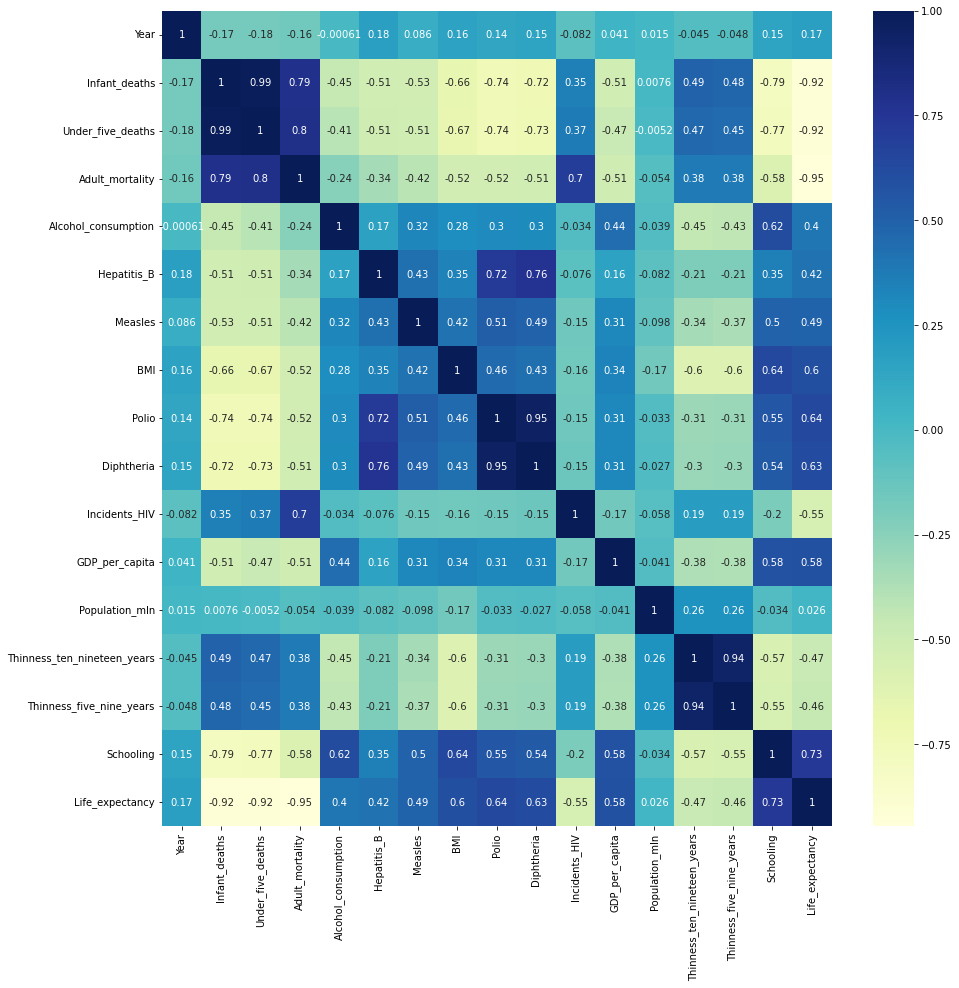

In [4]:
plt.figure(figsize=(15, 15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### Checking Correlation All to Life Expectancy to prepare Machine Learning

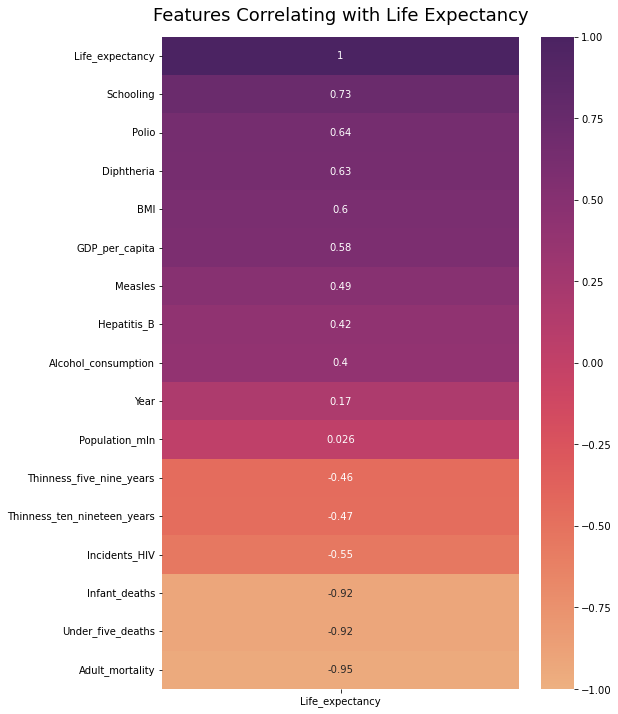

In [5]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Life_expectancy']].sort_values(by='Life_expectancy', ascending=False)
, vmin=-1, vmax=1, annot=True, cmap='flare')
heatmap.set_title('Features Correlating with Life Expectancy', fontdict={'fontsize':18}, pad=16);

- The main Purpose of our team to build Machine Learning Model is to explore which aspects could affect of Life Expectancy. Therefore, at first, we create a table correlation heatmap of every attributes over 'Life Expectancy'. As we could observe, almost all categories have correlation scores that impact on Longevity. Only Population shows that it is not so relevant to the target due to its score reaching 0. However, we have researched that in reality, population does extremely play a big role on a person life so it is not a big deal to keep the 'population_mln' in the input data of Model.


## 5. Using K-means Clustering to identify Levels of Life Satisfaction

[[ 8.72281809 73.52018927]
 [ 3.97987616 50.24860681]
 [11.03028765 79.5749577 ]
 [ 7.06777778 67.85851852]
 [ 4.23093682 59.65882353]]


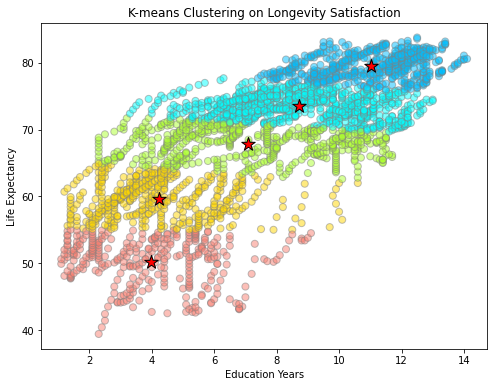

In [6]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap


df1 = df[['Schooling', 'Life_expectancy']]

kmeans = KMeans(n_clusters = 5, random_state = 42).fit(df1)
centroids = kmeans.cluster_centers_
print(centroids)

plt.figure(figsize=(8, 6))
colors = ['cyan', 'salmon', 'deepskyblue', 'greenyellow', 'gold']
cmap = ListedColormap(colors)

plt.scatter(df1['Schooling'], df1['Life_expectancy'], c = kmeans.labels_, cmap = cmap, s = 50, alpha = 0.5, edgecolor = 'grey')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 200, edgecolor = 'black', marker = '*')
plt.xlabel('Education Years')
plt.ylabel('Life Expectancy')
plt.title('K-means Clustering on Longevity Satisfaction')

plt.show()

- During the Research, we inquire that is better schooling experience could lead you to have a happy life. In addition, the scatter plot illustrates the positive  correlation of schooling experience over longevity. Here is a [reference](https://www.nber.org/system/files/working_papers/w12352/w12352.pdf), and definitely, with deeper knowledge base and experience, a person could avoid dangerosity, accident and prepare for their future better than the rest. However, in the scatter plot, there are many countries have higher longevity than expected by their low indicates of number of education years, so we would like to know life satisfaction level of a country. We decided to apply K-means that presents for 5 levels of satisfaction of Life Expectancy (very dissatisfied, dissatisfied, neutral, satisfied, very satisfied) and finally plot out this chart. The level of life satisfaction of a Country in our model is eventually based on numbers of schooling years and average age. We sequentially set color for each group with (red - very dissatisfied), (yellow - dissatisfied), (green - neutral), (light blue - satisfied), (dark blue - very satisfied). With group of very satisfied, we easliy could comprehend that their longevity is sufficiently highwhich means they have a healthy life and also long terms educated results in happiness of their life. About Neutral group, the range of education years is wide but they only live about 65 to 72 which is quite long enough for a human. With dissatisfied groups, they have not had well educated also have faced diversified difficulties in life, it is easy to infer to the lack of positive attitude toward life. This model have not been optimised yet, we built this to seek which country is worth to live and the other governments must improve their strategy and management to enhance people life quality.

## 5. Applying simple Linear Regression to predict Longevity

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

'''''
X_init = list(df.columns)
del X_init[14:17]
X_init = df[X_init]
X_init
'''''

X_init = df.copy()
del X_init['Country']

y = df['Life_expectancy']
X = pd.get_dummies(X_init[X_init.columns.difference(['Life_expectancy', 'Year'])])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)

model_confidence = model.score(X_test, y_test)
print("Confidence of the Model:", model_confidence)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

Confidence of the Model: 0.9830547277165378


- Our group has decided to split the dataset for training phase and test phase to validate the model, the two thirds for training model and the remaining data is for validating the model With categorical columns, we one-hot encoded them to let them participate in the Model. After training, we compare the prediction of test dataset to the actual values and earn up to 0.98 confidence score. The model is used for predicting the life expectancy of a country to manage the life quality of residents to identify whether that country is good enough to live or have too many challenges to encounter in upgrading life quality. Predicting longevity helps you to: 

1. Compare among nations to know which aspects lengthen their age
2. Prepare foods and goods for your residents
3. Design an appropriate for social development
4. Also a vital attribute devoting in Economics, Sociology, Geography Prediction
5. A remind to live in a healthier life

- Our Model has a formula:

y = ∑ a * x
 

With y is longevity and a is coefficeints and x is the factor effects of age

In [8]:
print("Linear Regression coefficients: ")
print("-----------------------------------------------------------------------------")
for i in range(len(X.columns)):
    print("With", X.columns[i], ":", model.coef_[i])
print("-----------------------------------------------------------------------------")

Linear Regression coefficients: 
-----------------------------------------------------------------------------
With Adult_mortality : -0.04778110968910544
With Alcohol_consumption : -0.0037891963131536322
With BMI : -0.14419341046732137
With Diphtheria : -0.010016970010398892
With GDP_per_capita : 1.8848930326352905e-05
With Hepatitis_B : -0.008303553370222741
With Incidents_HIV : 0.0998567169973774
With Infant_deaths : -0.053489481307448176
With Measles : 0.00233122181758527
With Polio : 0.01025360682945442
With Population_mln : -0.00025834944434633707
With Schooling : 0.11382154983825984
With Thinness_five_nine_years : 0.03146345493403617
With Thinness_ten_nineteen_years : -0.03844003901469193
With Under_five_deaths : -0.05051876554187024
With Economy status_Developed : 1.2493013848202978
With Economy status_Developing : -1.2493013848202987
With Region_Africa : -0.2941120869474811
With Region_Asia : -0.11243650014191173
With Region_Central America and Caribbean : 1.6157051477325655
W

## 6. Create Validating Chart

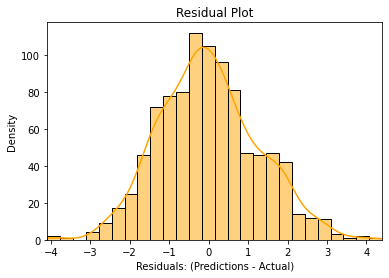

In [9]:
sns.histplot(residuals, kde = True, color = 'orange')
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.xlim(residuals.min(), residuals.max())
plt.ylabel('Density');

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


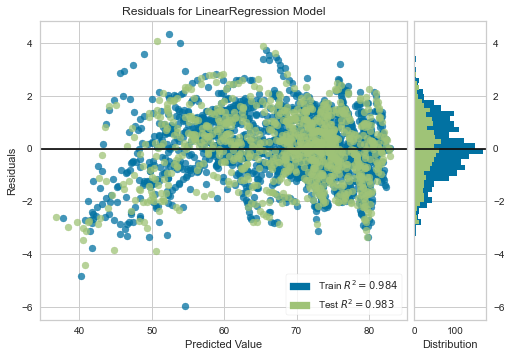

In [10]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.show();

- Almost all points distributed closed to 0 which means the model is fit

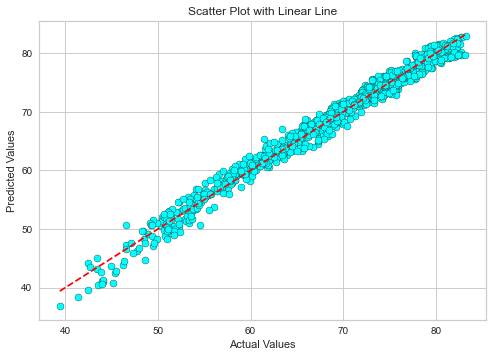

In [11]:
plt.scatter(y_test, y_pred, color = 'cyan', edgecolor = 'black')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Linear Line')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

- The points placed about on the identity line which means this model is quite reliable

<div style="text-align:center;">
    <strong><span style="font-size:30px;">Thank you Teacher for your Review</span></strong>
</div>